## import

In [68]:
import tensorflow._api.v2.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()

import matplotlib.pyplot as plt

## initialization


In [69]:
# variables
features = 3
eps = 1e-12
y = tf.placeholder(tf.float32, [None, 1])
x = tf.placeholder(tf.float32,[None,features])
w = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros(1))

# functions
alfa = 0.004
pred = tf.nn.sigmoid(tf.matmul(x,w) + b) # sigmoid function
# pred = 1 / (1.0 + tf.exp(-(tf.matmul(x,w) + b))) # tf.nn.sigmoid_cross_entropy_with_logits() 
tmp_loss = -(y * tf.log(pred + eps) + (1 - y) * tf.log( 1 - pred + eps))
loss = tf.reduce_mean(tmp_loss)
update = tf.train.GradientDescentOptimizer(0.001).minimize(loss)


## data
 x is  [ job,car,age ] and check if he is successful


In [70]:
data_x = [[1,1,46],[1,0,21],[0,1,61],[0,0,27],[0,0,32],[0,1,30],[1,0,10]]
data_y = [[1],[1],[1],[0],[0],[0],[0]]

data_t_x = [[1,1,27],[1,1,14],[1,0,12],[1,1,37]]
data_t_y = [[1],[0],[0],[1]]

## running the sim

In [71]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
show = 10
loss_in_time = []
w_arr = []
test_over_time = []
for i in range(0,100000):
       sess.run(update, feed_dict = {x:data_x, y:data_y})
       if(i%show==0 and i>100):
              tmp = sess.run(loss,feed_dict={x:data_x,y:data_y})
              loss_in_time.append(tmp)
              w_arr.append(sess.run(w))
              if(i%(show*50)==0):
                     print(f"i = {i}, loss = {tmp}")
              
              test_over_time.append(sess.run(loss,feed_dict={x:data_t_x,y:data_t_y}))


i = 500, loss = 0.6767364144325256
i = 1000, loss = 0.6673064231872559
i = 1500, loss = 0.6581597924232483
i = 2000, loss = 0.6492848992347717
i = 2500, loss = 0.6406704783439636
i = 3000, loss = 0.6323056817054749
i = 3500, loss = 0.6241807341575623
i = 4000, loss = 0.6162856817245483
i = 4500, loss = 0.6086114048957825
i = 5000, loss = 0.6011492609977722
i = 5500, loss = 0.5938907265663147
i = 6000, loss = 0.5868280529975891
i = 6500, loss = 0.5799534916877747
i = 7000, loss = 0.5732598900794983
i = 7500, loss = 0.5667403936386108
i = 8000, loss = 0.5603883862495422
i = 8500, loss = 0.5541976094245911
i = 9000, loss = 0.5481621026992798
i = 9500, loss = 0.5422762036323547
i = 10000, loss = 0.5365342497825623
i = 10500, loss = 0.5309311747550964
i = 11000, loss = 0.5254620909690857
i = 11500, loss = 0.5201221704483032
i = 12000, loss = 0.5149068236351013
i = 12500, loss = 0.5098116397857666
i = 13000, loss = 0.5048327445983887
i = 13500, loss = 0.4999658167362213
i = 14000, loss = 0.4

## printing and testing

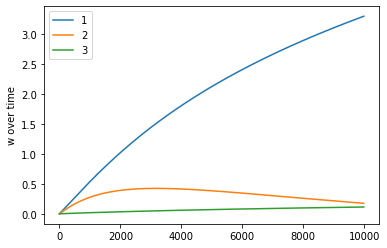

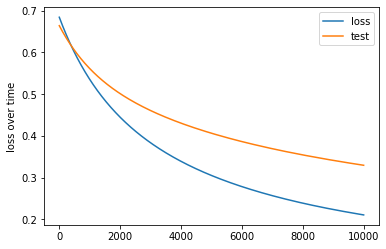

In [72]:
d = np.array(np.array(w_arr).transpose()[0]).transpose()
plt.plot(d,label = [1,2,3])
plt.legend()
plt.ylabel('w over time')
plt.show()

plt.plot(loss_in_time,label ="loss")
plt.plot(test_over_time , label ="test")
plt.legend()
plt.ylabel('loss over time')
plt.show()

## show random check

In [73]:
print(sess.run(pred,feed_dict={x:[[0,1,70]]}))

[[0.9592744]]
